In [64]:
#画像の読み取り
import cv2
img1 = cv2.imread("image1.png")
img2 = cv2.imread("image2.png")
A=img1.shape[0]#画像ファイルのサイズの取得
B=img1.shape[1]
C=img1.shape[2]

In [65]:
img1=img1.reshape(1,-1)#一次元の形に変形
img2=img2.reshape(1,-1)

In [66]:
img1.shape
img2.shape

(1, 786432)

In [67]:
import numpy as np
x = np.array([[img1],[img2]])
x=np.asmatrix(x)


In [68]:
#白色化
x=x-np.mean(x,axis=1)
Σ=1/x.shape[1]*np.dot(x,x.T)
l, P = np.linalg.eig(Σ )
# D=np.diag(l), D=P.T*Σ*P
L=l**(-0.5)
P=P
V=np.dot(np.dot(P,np.diag(L)),P.T)
z=np.dot(V,x)
z

matrix([[ 1.18739242,  1.18739242,  1.18739242, ...,  0.5570705 ,
          0.5570705 ,  0.5570705 ],
        [ 0.74778728,  0.74778728,  0.74778728, ..., -0.25750184,
         -0.25750184, -0.25750184]])

In [69]:
W=np.array([[0.0,0.0],[0.0,0.0]])#Wの初期化
flag=0
ε=0.0000000000000000001
while flag< 2:
    w=np.random.rand(2,1)
    w=w/np.linalg.norm(w)
    while True:
        p=w
        w=np.dot(z,np.power(w.T*z,3).T)*1/(z.shape[1])-3*w  # 𝔼[𝒛(𝒘⊤𝒛)3] − 3𝒘　(計算の次元を等しくするためにw.T*z,3を転置した)
        w= w/np.linalg.norm(w)
        if (((w[0]-p[0])**2<ε and (w[1]-p[1])**2<ε)or( (w[0]+p[0])**2<ε and (w[1]+p[1])**2<ε)):
            if  (flag==0):
                flag+=1
                W[0]=w.T
                break
            if (flag==1):
                if  ((w[0]-W[0][0])**2>ε and (w[1]-W[0][1])**2>ε and (w[0]+W[0][0])**2>ε and (w[1]+W[0][1])**2>ε):
                    flag+=1
                    W[1]=w.T
                break
        
W

array([[-0.03361483,  0.99943486],
       [-0.99858361,  0.0532051 ]])

In [70]:
#Wの要素の正負を調整する。
for i in range (2):
    if W[i][0]<0 and W[i][1]< 0:
        W[i]=-W[i]
    elif abs(W[i][0])<abs(W[i][1]) and W[i][1]< 0:
        W[i]=-W[i]
    elif abs(W[i][0])>abs(W[i][1]) and W[i][0]< 0:
        W[i]=-W[i]
W
    

array([[-0.03361483,  0.99943486],
       [ 0.99858361, -0.0532051 ]])

In [107]:
#yは平均0のベクトルなので、RBG画像になるように調整する。
y=np.dot(W,z)
y[0]=np.array(y[0])
y[1]=np.array(y[1])
y=y+2.877980834902241
y=y*45
y.min()

8.09559519421299e-07

In [108]:
outimg1=np.array(y[0]).reshape(A,B,C)
outimg2=np.array(y[1]).reshape(A,B,C)
outimg2.shape

(512, 512, 3)

In [109]:
cv2.imwrite("outimg1.png", outimg1)
cv2.imwrite("outimg2.png", outimg2)

True

In [ ]:
#matplotlibで可視化するためにfloat型をint型に変更する。
outimg1_round  = outimg1.astype(np.int32)
outimg2_round  = outimg2.astype(np.int32)

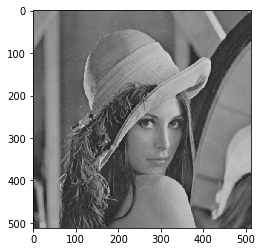

In [111]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(outimg1_round )

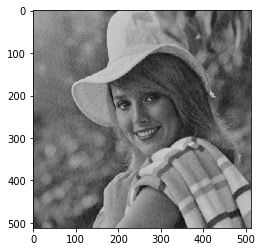

In [112]:
plt.imshow(outimg2_round )